<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Webmd_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WebMD.com Data Exploration

Description - 

Attribute Information:

1. Age
2. Condition
3. Date
4. Drug
5. DrugId
6. Easeofuse
7. Effectiveness
8. Review
9. Sex
10. Sides
11. UsefulCount

In [ ]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
from wordcloud import WordCloud
import altair as alt


In [ ]:
#Cloning Git repository
!git clone https://github.com/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System.git

Cloning into 'Medicines-and-Common-Treatment-Recommendation-System'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 123 (delta 70), reused 30 (delta 9), pack-reused 0
Receiving objects: 100% (123/123), 44.87 MiB | 8.99 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
!ls Medicines-and-Common-Treatment-Recommendation-System/Drugscom

 drugsComTest_raw.csv   drugsComTrain_raw.tsv
 drugsComTest_raw.tsv  'drugscom train treatments.xlsx'


## Data Loading

In [ ]:
# Importing dataset from drive
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/Webmd')

Mounted at /content/gdrive/


In [ ]:
#Loading webmd data
webmd_df=pd.read_csv('/content/gdrive/My Drive/Webmd/webmd.csv')

In [ ]:
webmd_df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [ ]:
#Dataset shape
print("Webmd Data shape :" ,webmd_df.shape)


Webmd Data shape : (362806, 12)


In [ ]:
#Data Information
webmd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


##Data Cleaning

In [ ]:
#Checking for null values
webmd_df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

It sees there are 37 null reviews present in the dataset.

Visualizing the missing data.

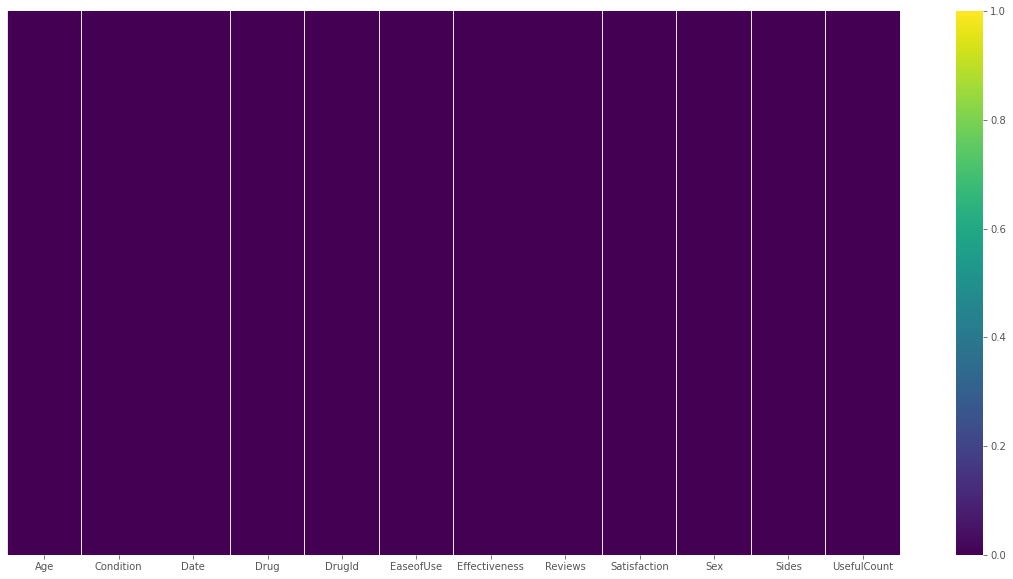

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(webmd_df.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

## Checking count of Unique values of each features

In [ ]:
[[col, webmd_df[col].nunique()] for col in webmd_df.columns.difference(["Reviews"])]


[['Age', 12],
 ['Condition', 1806],
 ['Date', 4524],
 ['Drug', 7093],
 ['DrugId', 6572],
 ['EaseofUse', 7],
 ['Effectiveness', 7],
 ['Satisfaction', 7],
 ['Sex', 3],
 ['Sides', 1650],
 ['UsefulCount', 148]]

In [ ]:
unique_values = [[c, webmd_df[c].nunique()] for c in webmd_df.columns.difference(["Reviews"])]
df_unique = pd.DataFrame(data=unique_values, columns=["columns", "count of unique values"])
df_unique

,columns,count of unique values
0,Age,12
1,Condition,1806
2,Date,4524
3,Drug,7093
4,DrugId,6572
5,EaseofUse,7
6,Effectiveness,7
7,Satisfaction,7
8,Sex,3
9,Sides,1650


In [ ]:
fig = px.bar(df_unique, y='count of unique values', x='columns', text='count of unique values')
fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
fig.update_yaxes(dtick=500)
fig.update_layout(title_text='Unique values count of each feature')
fig.show()

From the above plot, we can see the unique values of all the features present in the data.


## Top 5 drugs satisfaction level


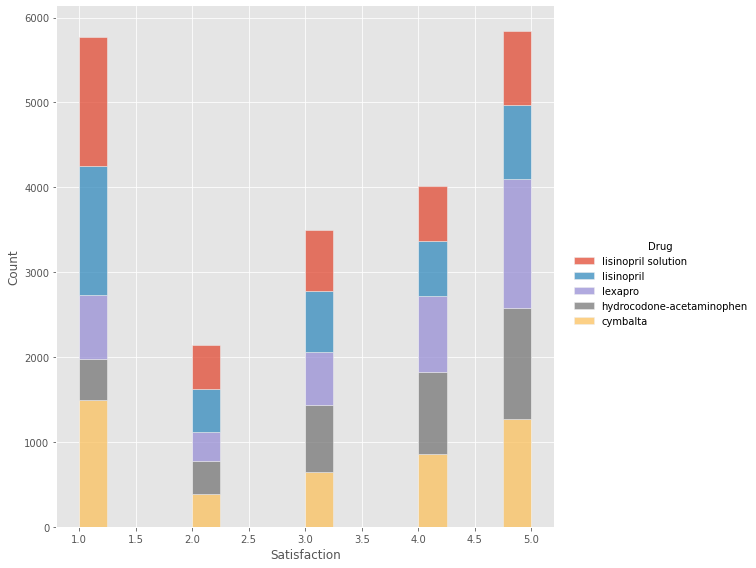

In [ ]:
top_5_drugs=webmd_df["Drug"].value_counts().sort_values(ascending=False)[:5]
top_5_drugs_df=pd.DataFrame(zip(top_5_drugs.index, top_5_drugs), columns = ["Drug", "count"])
rating_top_5_df=webmd_df.loc[webmd_df["Drug"].isin(top_5_drugs.index), :]
sns.displot(rating_top_5_df, x="Satisfaction", hue="Drug", multiple="stack",height=8)

Above plot shows that lexapro drug has the most reviews present in the dataset with the satisfaction level 5.

In [ ]:
df_age=pd.DataFrame(webmd_df[["Age","Effectiveness"]].value_counts().sort_values(ascending=False)).reset_index()
df_age=df_age.rename(columns={0: 'Count'})
#removing rows with age column having null values
df_age=df_age[df_age['Age']!='']

In [ ]:
import plotly.express as px
data = px.data.gapminder()

fig = px.bar(df_age, x='Age', y='Count',
             hover_data=['Effectiveness', 'Age','Count'], color='Effectiveness',
             title='Review count for different age group and its effectiveness', height=700)
fig.show()

Above plot indicates the different age groups present in the data and how the drug were effective for those age groups.